In [72]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [73]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(197.89445, shape=(), dtype=float32)


In [74]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [149]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\harsh\\OneDrive\\Desktop\\fruits_Recognition_system\\Plant_deasieas\\train'
,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 3115 files belonging to 36 classes.


In [150]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\harsh\\OneDrive\\Desktop\\fruits_Recognition_system\\Plant_deasieas\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 351 files belonging to 36 classes.


In [151]:
cnn=tf.keras.models.Sequential()

Builiding Covolution layer

In [152]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [153]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [154]:
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [155]:
cnn.add(tf.keras.layers.Flatten())

In [156]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [157]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #Output Layer 

Compiling and Training Phase of Model

In [158]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [159]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.0409 - loss: 32.8843 - val_accuracy: 0.0769 - val_loss: 3.5104
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.0553 - loss: 3.5496 - val_accuracy: 0.1168 - val_loss: 3.4276
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.0929 - loss: 3.5864 - val_accuracy: 0.2194 - val_loss: 2.9956
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.1338 - loss: 3.2814 - val_accuracy: 0.3020 - val_loss: 2.7679
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.1712 - loss: 3.2689 - val_accuracy: 0.3618 - val_loss: 2.6139
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.2348 - loss: 2.9578 - val_accuracy: 0.3818 - val_loss: 2.4275
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.2758 - loss: 2.6928 - val_accuracy: 0.5385 - val_loss: 2.0121
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.3314 - loss: 2.4917 - val_accuracy

SAving the model


In [160]:
cnn.save('trained_model.keras')

In [161]:
training_history.history

{'accuracy': [0.04430176690220833,
  0.05842696502804756,
  0.10208667814731598,
  0.15056179463863373,
  0.18651685118675232,
  0.24398073554039001,
  0.2921348214149475,
  0.35569822788238525,
  0.4025682210922241,
  0.44686996936798096,
  0.48571428656578064,
  0.5418940782546997,
  0.5617977380752563,
  0.5929374098777771,
  0.6272873282432556,
  0.643338680267334,
  0.6703049540519714,
  0.6902086734771729,
  0.6937399506568909,
  0.7171749472618103,
  0.7351524829864502,
  0.7508828043937683,
  0.7573033571243286,
  0.7595505714416504,
  0.7826645374298096,
  0.7874799370765686,
  0.8003210425376892,
  0.8028892278671265,
  0.8086677193641663,
  0.8118780255317688],
 'loss': [10.781110763549805,
  3.5229997634887695,
  3.4510138034820557,
  3.2343413829803467,
  3.12041974067688,
  2.891270160675049,
  2.660168170928955,
  2.455738067626953,
  2.2700705528259277,
  2.0761117935180664,
  1.9467062950134277,
  1.8127714395523071,
  1.7560580968856812,
  1.6724827289581299,
  1.5160

In [162]:
#Recording History

import json
with open('training_history.json','w')as f:
    json.dump(training_history.history,f)

In [168]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Calculating Accuracy of Model

In [169]:
training_history.history

{'accuracy': [0.04430176690220833,
  0.05842696502804756,
  0.10208667814731598,
  0.15056179463863373,
  0.18651685118675232,
  0.24398073554039001,
  0.2921348214149475,
  0.35569822788238525,
  0.4025682210922241,
  0.44686996936798096,
  0.48571428656578064,
  0.5418940782546997,
  0.5617977380752563,
  0.5929374098777771,
  0.6272873282432556,
  0.643338680267334,
  0.6703049540519714,
  0.6902086734771729,
  0.6937399506568909,
  0.7171749472618103,
  0.7351524829864502,
  0.7508828043937683,
  0.7573033571243286,
  0.7595505714416504,
  0.7826645374298096,
  0.7874799370765686,
  0.8003210425376892,
  0.8028892278671265,
  0.8086677193641663,
  0.8118780255317688],
 'loss': [10.781110763549805,
  3.5229997634887695,
  3.4510138034820557,
  3.2343413829803467,
  3.12041974067688,
  2.891270160675049,
  2.660168170928955,
  2.455738067626953,
  2.2700705528259277,
  2.0761117935180664,
  1.9467062950134277,
  1.8127714395523071,
  1.7560580968856812,
  1.6724827289581299,
  1.5160

In [170]:
print("validation set Accuracy:{}%".format(training_history.history['val_accuracy'][-1]*100))

validation set Accuracy:89.45869207382202%


#Accuracy Visualization


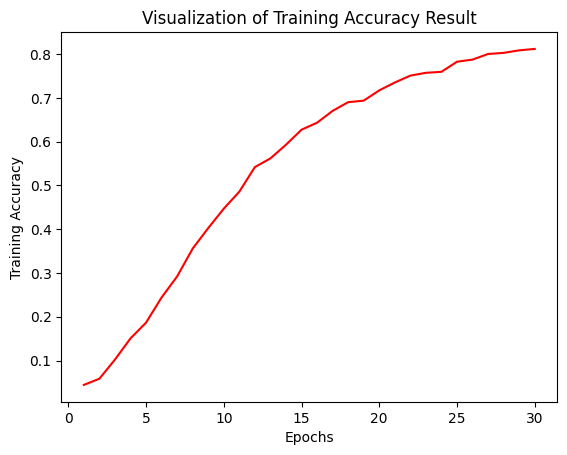

In [171]:
epochs=[i for i in range (1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

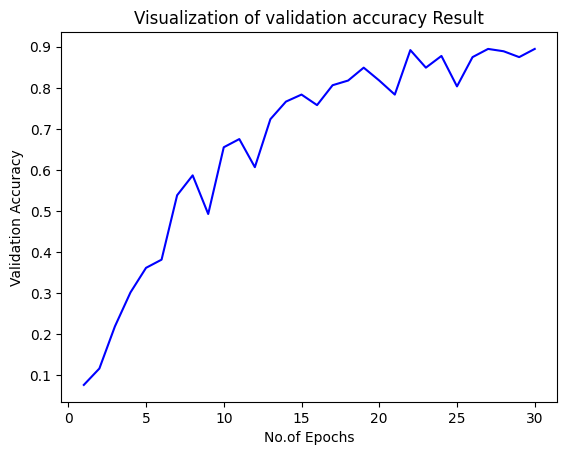

In [172]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No.of Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Visualization of validation accuracy Result")
plt.show()

